In [1]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_excel('Data_Train.xlsx')
dt1=pd.read_excel('Test_set.xlsx')
dt2=pd.read_excel('Sample_submission.xlsx')

In [3]:
df=pd.concat([dt1,dt2], axis=1)

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [5]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
d=pd.concat([df,dt], axis=0)

In [7]:
#Concating df and dt
d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
print('The shape of the dataset is', d.shape)

The shape of the dataset is (13354, 11)


In [9]:
# Dataframe columns
d.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
# To find the data type of the dataset
for col in d:
    print ('This column', col ,'has', d[col].unique(),'unique elements')
    print ('*'*100)

This column Airline has ['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business' 'Trujet'] unique elements
****************************************************************************************************
This column Date_of_Journey has ['6/06/2019' '12/05/2019' '21/05/2019' '24/06/2019' '12/06/2019'
 '12/03/2019' '1/05/2019' '15/03/2019' '18/05/2019' '21/03/2019'
 '15/06/2019' '15/05/2019' '3/06/2019' '06/03/2019' '24/03/2019'
 '6/03/2019' '9/05/2019' '18/03/2019' '6/04/2019' '1/06/2019' '3/03/2019'
 '27/03/2019' '9/06/2019' '3/05/2019' '1/04/2019' '18/06/2019'
 '15/04/2019' '6/05/2019' '9/03/2019' '3/04/2019' '27/06/2019'
 '21/06/2019' '21/04/2019' '18/04/2019' '9/04/2019' '24/05/2019'
 '01/03/2019' '09/03/2019' '27/05/2019' '03/03/2019' '27/04/2019'
 '1/03/2019' '24/04/2019' '12/04/2019'] unique elements
****************************************************

In [11]:
# Seeing for the null values in the dataset
d.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

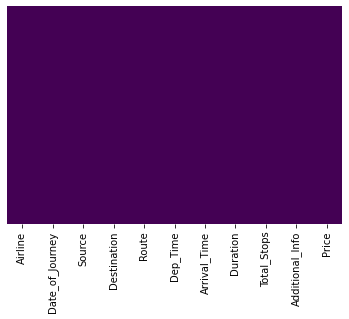

In [12]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [13]:
# Getting information on the dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
 10  Price            13354 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


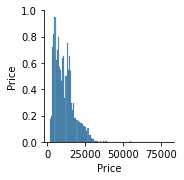

In [14]:
sns.pairplot(d)

In [15]:
# To find the correlection in the dataset
d.corr()

,Price
Price,1.0


<AxesSubplot:>

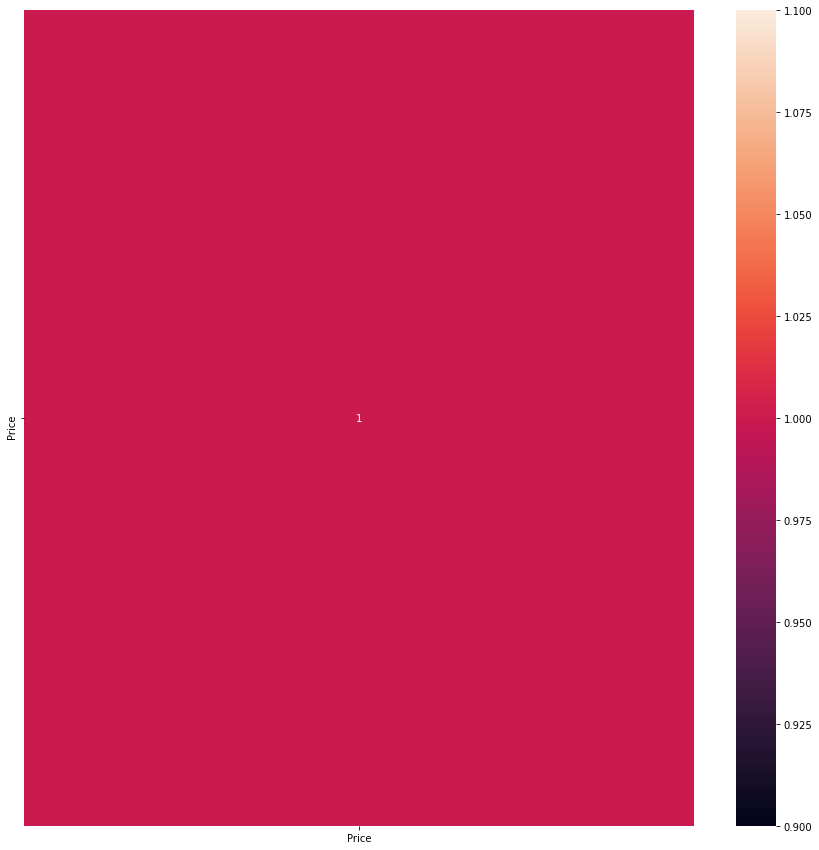

In [16]:
e=d.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [17]:
# To find the data type of the dataset
d.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               132
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           5
Additional_Info      10
Price              4255
dtype: int64

In [18]:
d.describe()

,Price
count,13354.000000
mean,11301.720009
std,6452.843082
min,1759.000000
25%,6135.250000
50%,10262.000000
75%,14781.000000
max,79512.000000


In [19]:
d.drop_duplicates(keep='first',inplace=True)

# EDA

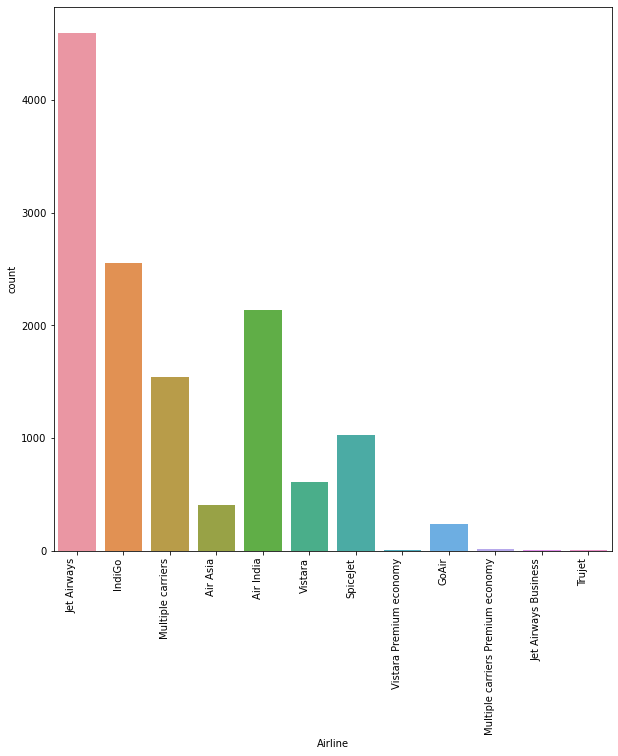

In [20]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(d['Airline'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

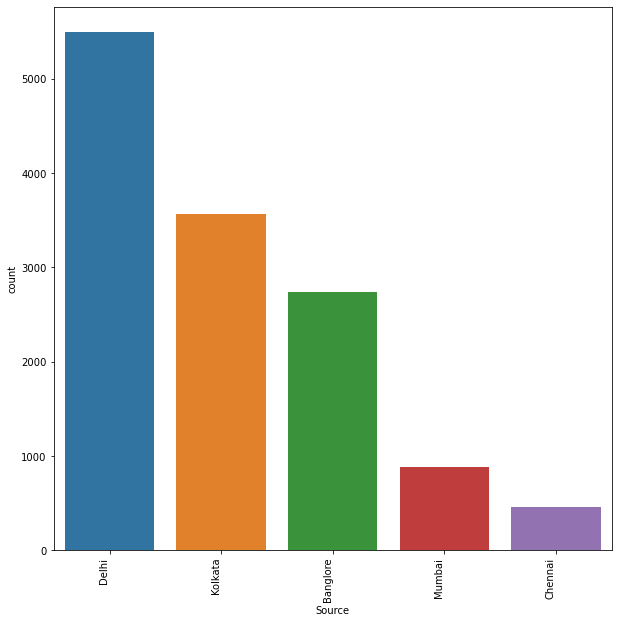

In [21]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(d['Source'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

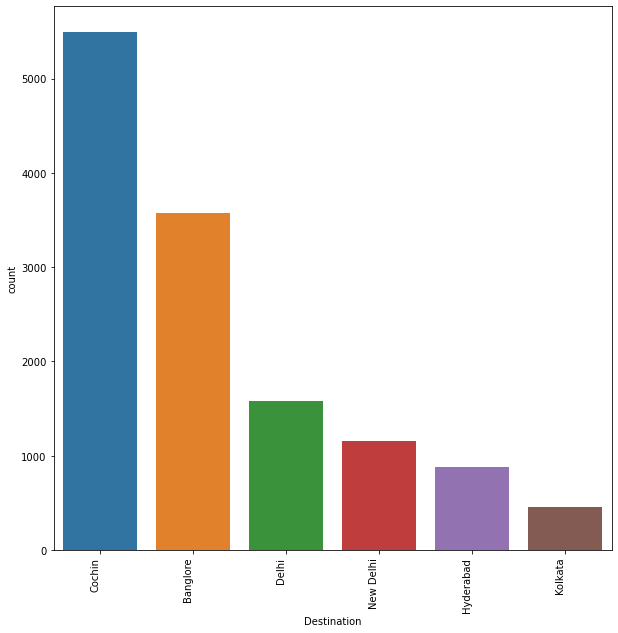

In [22]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(d['Destination'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

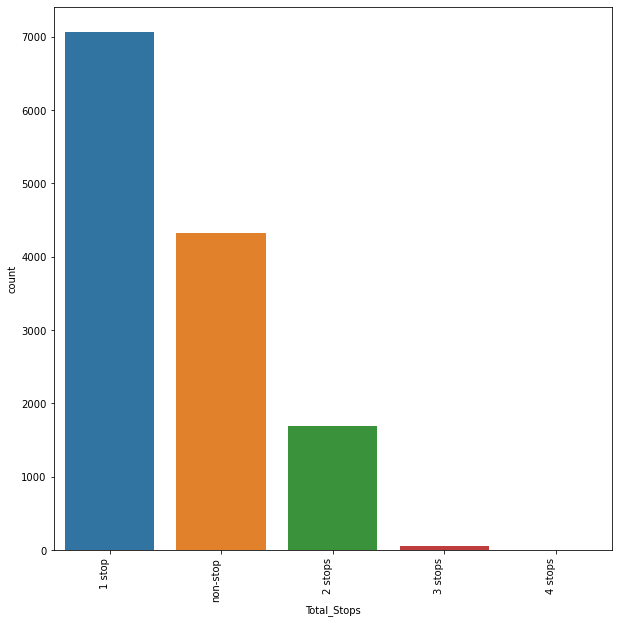

In [23]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(d['Total_Stops'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

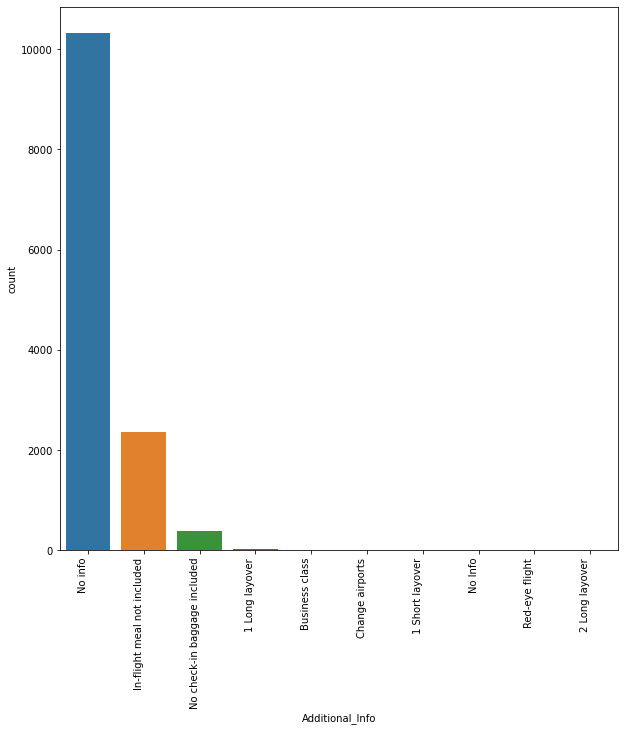

In [24]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(d['Additional_Info'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

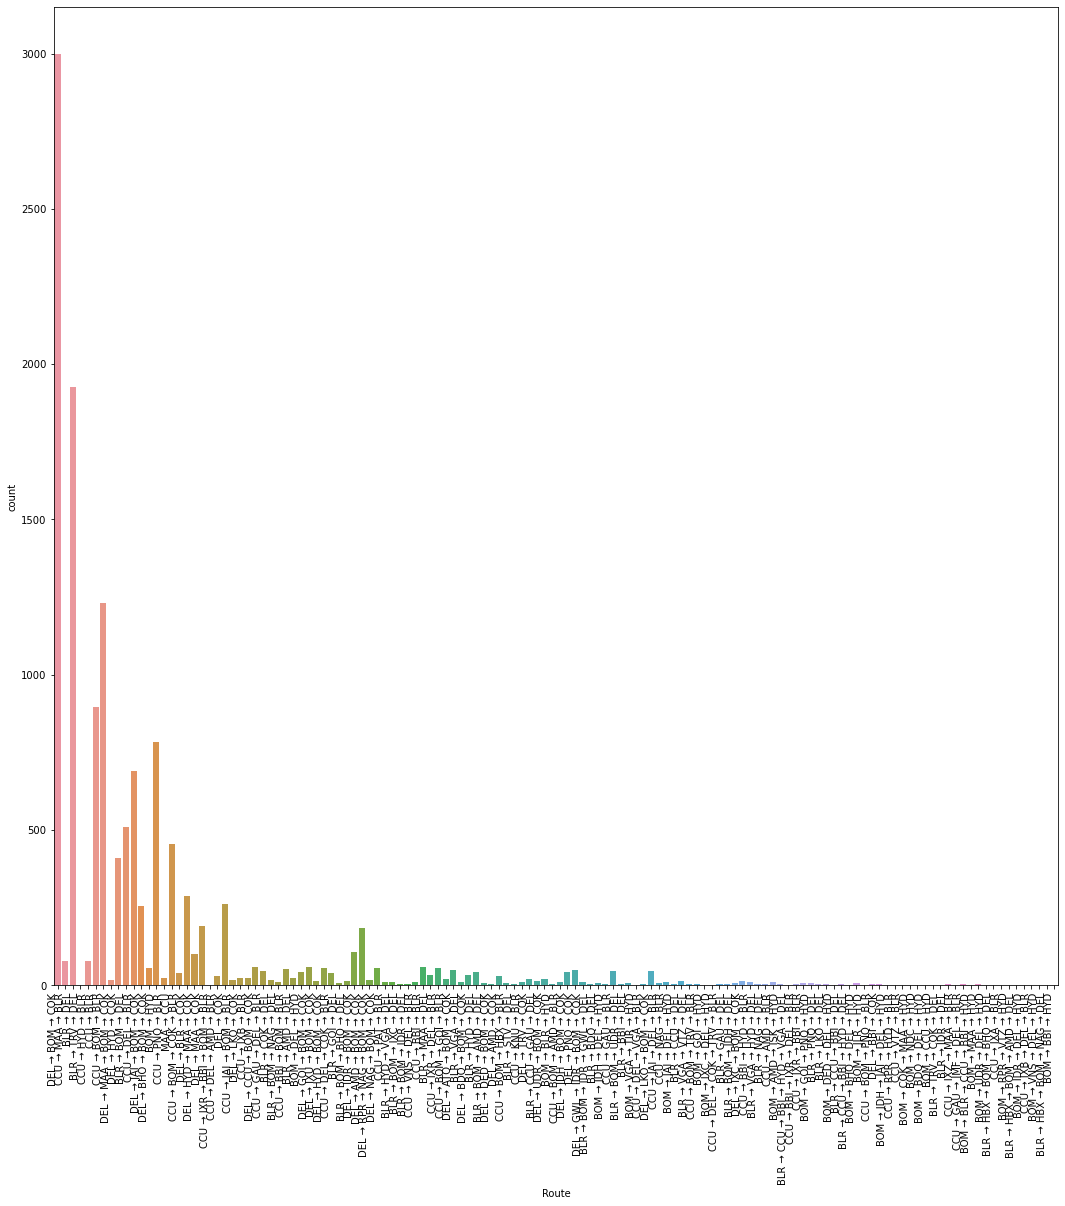

In [25]:
plt.subplots(figsize=(18,18))
chart =sns.countplot(d['Route'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

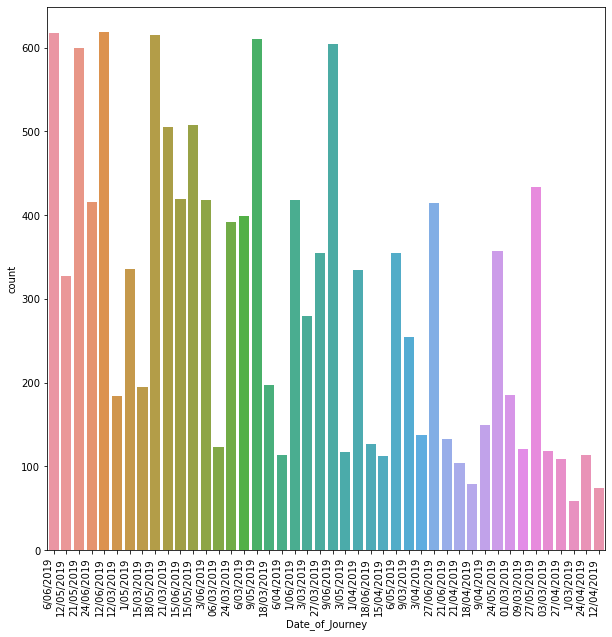

In [26]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(d['Date_of_Journey'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [27]:
(d.groupby('Duration')['Price'].mean()).sort_values()

Duration
3h 55m      4226.000000
3h 35m      5918.400000
3h 50m      6006.333333
1h 15m      6944.166667
2h 15m      6956.353659
               ...     
36h 25m    20912.000000
37h 10m    21314.000000
39h 5m     21676.000000
32h 20m    27405.000000
3h 45m     29304.000000
Name: Price, Length: 374, dtype: float64

<AxesSubplot:xlabel='Airline'>

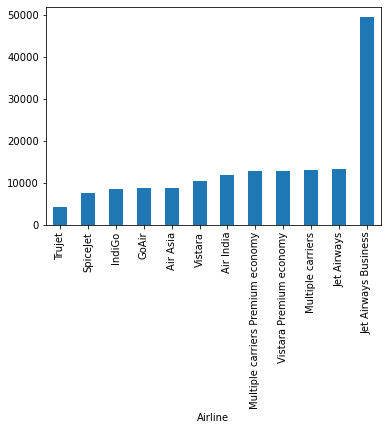

In [28]:
((d.groupby('Airline')['Price'].mean()).sort_values()).plot(kind='bar')

<AxesSubplot:xlabel='Source'>

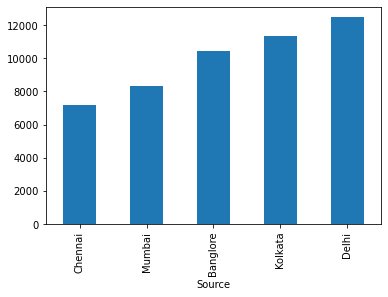

In [29]:
((d.groupby('Source')['Price'].mean()).sort_values()).plot(kind='bar')

<AxesSubplot:xlabel='Destination'>

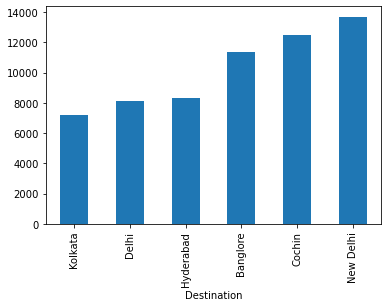

In [30]:
((d.groupby('Destination')['Price'].mean()).sort_values()).plot(kind='bar')

<AxesSubplot:xlabel='Date_of_Journey'>

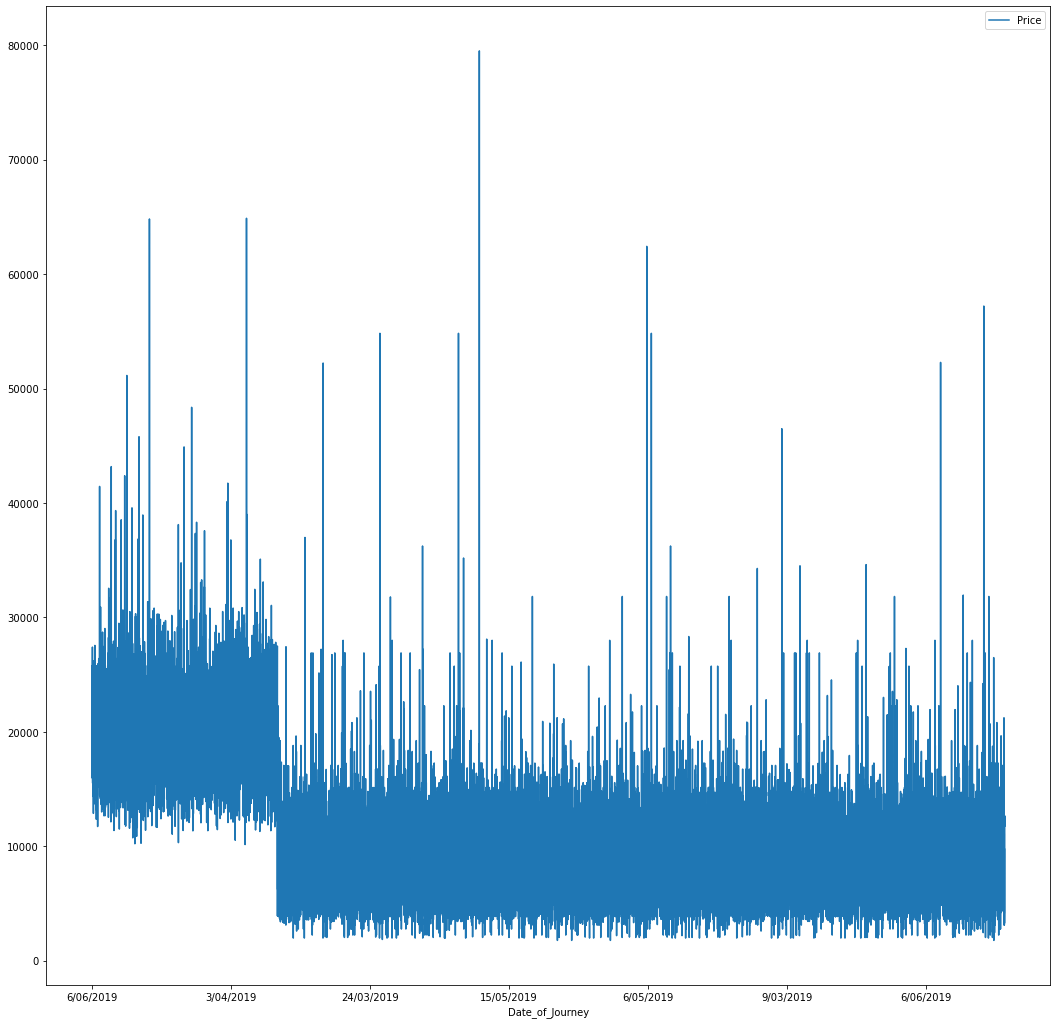

In [31]:
d.plot(kind='line',x='Date_of_Journey',y='Price',figsize=(18,18))

<AxesSubplot:xlabel='Total_Stops'>

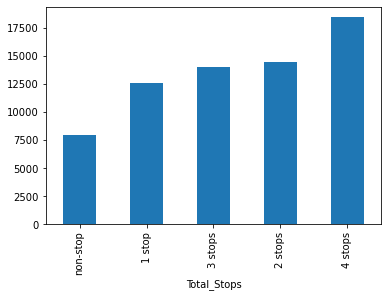

In [32]:
((d.groupby('Total_Stops')['Price'].mean()).sort_values()).plot(kind='bar')

<AxesSubplot:xlabel='Additional_Info'>

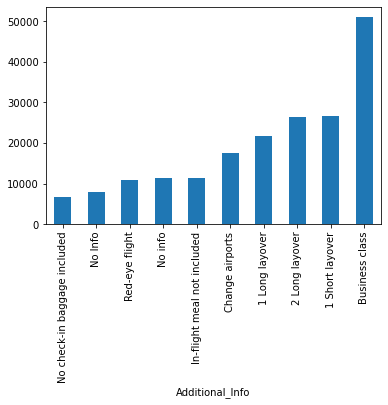

In [33]:
((d.groupby('Additional_Info')['Price'].mean()).sort_values()).plot(kind='bar')

In [34]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [35]:
dt1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [36]:
dt['Duration'] = dt['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [37]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648


In [38]:
dt1['Duration'] = dt1['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [39]:
dt1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,1435,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,155,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,395,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,915,1 stop,No info


In [40]:
dt['Journey_day'] = dt['Date_of_Journey'].str.split('/').str[0].astype(int)
dt['Journey_month'] = dt['Date_of_Journey'].str.split('/').str[1].astype(int)

In [41]:
dt1['Journey_day'] = dt1['Date_of_Journey'].str.split('/').str[0].astype(int)
dt1['Journey_month'] = dt1['Date_of_Journey'].str.split('/').str[1].astype(int)

In [42]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648,1,3


In [43]:
dt1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,1435,1 stop,No info,6,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,155,non-stop,No info,27,3
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,395,1 stop,No info,6,3
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,915,1 stop,No info,6,3


In [44]:
d['Journey_day'] = d['Date_of_Journey'].str.split('/').str[0].astype(int)
d['Journey_month'] = d['Date_of_Journey'].str.split('/').str[1].astype(int)

In [45]:
d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


<AxesSubplot:xlabel='Journey_month'>

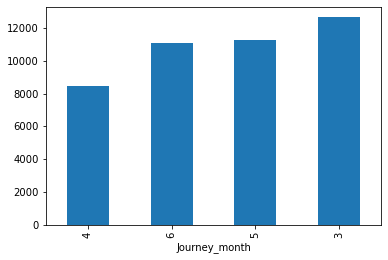

In [46]:
((d.groupby('Journey_month')['Price'].mean()).sort_values()).plot(kind='bar')

<AxesSubplot:>

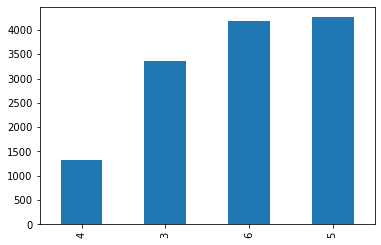

In [47]:
((d['Journey_month'].value_counts()).sort_values()).plot(kind='bar')

<AxesSubplot:>

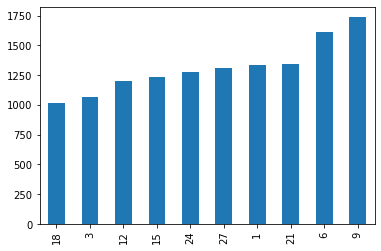

In [48]:
((d['Journey_day'].value_counts()).sort_values()).plot(kind='bar')

<AxesSubplot:>

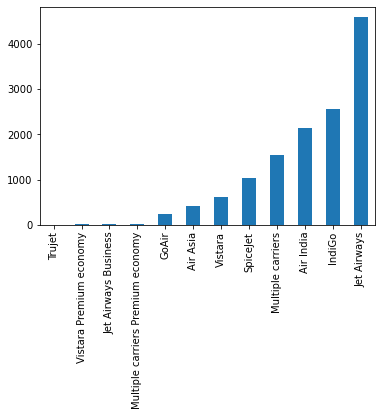

In [49]:
((d['Airline'].value_counts()).sort_values()).plot(kind='bar')

<AxesSubplot:xlabel='Airline'>

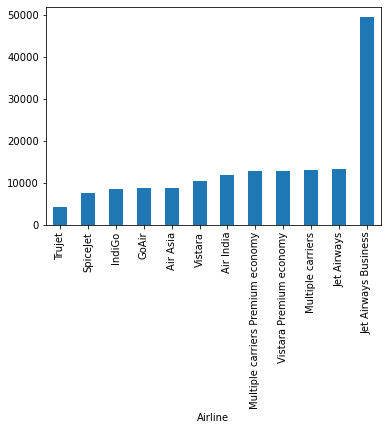

In [50]:
((d.groupby('Airline')['Price'].mean()).sort_values()).plot(kind='bar')

In [51]:
dt.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [52]:
dt1.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [53]:
dt.dropna(inplace=True)
dt1.dropna(inplace=True)

In [54]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [55]:
# Assigning to a variable
le=LabelEncoder()

In [56]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['Airline']=le.fit_transform(dt['Airline'])
dt['Source']=le.fit_transform(dt['Source'])
dt['Destination']=le.fit_transform(dt['Destination'])
dt['Route']=le.fit_transform(dt['Route'])
dt['Additional_Info']=le.fit_transform(dt['Additional_Info'])
dt['Total_Stops']=le.fit_transform(dt['Total_Stops'])
dt1['Airline']=le.fit_transform(dt1['Airline'])
dt1['Source']=le.fit_transform(dt1['Source'])
dt1['Destination']=le.fit_transform(dt1['Destination'])
dt1['Route']=le.fit_transform(dt1['Route'])
dt1['Additional_Info']=le.fit_transform(dt1['Additional_Info'])
dt1['Total_Stops']=le.fit_transform(dt1['Total_Stops'])

In [57]:
dt

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,3,0,5,18,170,4,8,3897,24,3
1,1,3,0,84,445,1,8,7662,1,5
2,4,2,1,118,1140,1,8,13882,9,6
3,3,3,0,91,325,0,8,6218,12,5
4,3,0,5,29,285,0,8,13302,1,3
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,8,4107,9,4
10679,1,3,0,64,155,4,8,4145,27,4
10680,4,0,2,18,180,4,8,7229,27,4
10681,10,0,5,18,160,4,8,12648,1,3


In [58]:
dt1

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,4,2,1,76,655,0,5,6,6
1,3,3,0,65,240,0,5,12,5
2,4,2,1,76,1425,0,3,21,5
3,6,2,1,76,780,0,5,21,5
4,0,0,2,16,170,4,5,24,6
...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,1435,0,5,6,6
2667,3,3,0,43,155,4,5,27,3
2668,4,2,1,76,395,0,5,6,3
2669,1,2,1,76,915,0,5,6,3


In [61]:
# Assignment of X and y
X=dt.drop(['Price'], axis=1)
y=dt.Price

In [62]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [63]:
# Applying machine learning models
# Importing machine learning libraries
# The problem is related regression the regression models are used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [64]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :-0.4027720891859541
At random state, 1, the testing accuracy is :0.4224726307718777


At random state, 2, the training accuracy is :-0.40357428555559505
At random state, 2, the testing accuracy is :0.42098022697283155


At random state, 3, the training accuracy is :-0.4533903161120818
At random state, 3, the testing accuracy is :0.46062260286607226


At random state, 4, the training accuracy is :-0.36466009980066194
At random state, 4, the testing accuracy is :0.3962920142915005


At random state, 5, the training accuracy is :-0.38256171229695046
At random state, 5, the testing accuracy is :0.4085316330012594


At random state, 6, the training accuracy is :-0.37531787157436014
At random state, 6, the testing accuracy is :0.4029884217432739


At random state, 7, the training accuracy is :-0.4303056200839048
At random state, 7, the testing accuracy is :0.4420103590485085


At random state, 8, the training accuracy is :-0.38883062276168645
At 

In [65]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.9643273322074708
At random state, 1, the testing accuracy is :0.8708656389728431


At random state, 2, the training accuracy is :0.9617375205780022
At random state, 2, the testing accuracy is :0.8378795280180589


At random state, 3, the training accuracy is :0.9654462565107509
At random state, 3, the testing accuracy is :0.8286621638599123


At random state, 4, the training accuracy is :0.9550373111925954
At random state, 4, the testing accuracy is :0.8841156527021833


At random state, 5, the training accuracy is :0.9660249142989195
At random state, 5, the testing accuracy is :0.8609107599669032


At random state, 6, the training accuracy is :0.9578842818360566
At random state, 6, the testing accuracy is :0.8488265344395345


At random state, 7, the training accuracy is :0.9644910587449765
At random state, 7, the testing accuracy is :0.860875612662076


At random state, 8, the training accuracy is :0.9614819948187987
At random state, 8,

In [66]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9828470300538056
At random state, 1, the testing accuracy is :0.7991922847699068


At random state 2, the training accuracy is :0.9762874171827326
At random state, 2, the testing accuracy is :0.7465952909507431


At random state 3, the training accuracy is :0.9831360161715696
At random state, 3, the testing accuracy is :0.7200092809735898


At random state 4, the training accuracy is :0.9756394374532353
At random state, 4, the testing accuracy is :0.8299287344980361


At random state 5, the training accuracy is :0.9826719091718416
At random state, 5, the testing accuracy is :0.8040541704371809


At random state 6, the training accuracy is :0.9790484859076641
At random state, 6, the testing accuracy is :0.7130887811942881


At random state 7, the training accuracy is :0.9827943738193637
At random state, 7, the testing accuracy is :0.7653912033576945


At random state 8, the training accuracy is :0.9768458536173652
At random state, 8, the te

In [67]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9480947565307334
At random state, 1, the testing accuracy is :0.8857454109976804


At random state 2, the training accuracy is :0.9436473502787747
At random state, 2, the testing accuracy is :0.8857683755622009


At random state 3, the training accuracy is :0.9522127179965333
At random state, 3, the testing accuracy is :0.8204243535134135


At random state 4, the training accuracy is :0.941699563862492
At random state, 4, the testing accuracy is :0.8998915930335043


At random state 5, the training accuracy is :0.9460470639643567
At random state, 5, the testing accuracy is :0.8838734496598378


At random state 6, the training accuracy is :0.9478014909248141
At random state, 6, the testing accuracy is :0.8308325334484791


At random state 7, the training accuracy is :0.9481098512701275
At random state, 7, the testing accuracy is :0.8680480207417021


At random state 8, the training accuracy is :0.9401920563476449
At random state, 8, the tes

In [68]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    predtrain=ad.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.2575409916086543
At random state, 1, the testing accuracy is :0.4611054021890979


At random state, 2, the training accuracy is :0.2811896404085471
At random state, 2, the testing accuracy is :0.4885200269851683


At random state, 3, the training accuracy is :0.30602350041532633
At random state, 3, the testing accuracy is :0.4847508096617287


At random state, 4, the training accuracy is :0.25990568556579097
At random state, 4, the testing accuracy is :0.4231660839891337


At random state, 5, the training accuracy is :0.26695687221136266
At random state, 5, the testing accuracy is :0.5558666865935418


At random state, 6, the training accuracy is :0.26133604690763257
At random state, 6, the testing accuracy is :0.5592114005795109


At random state, 7, the training accuracy is :0.32299348811442397
At random state, 7, the testing accuracy is :0.48706780144269224


At random state, 8, the training accuracy is :0.3338920362644775
At random st

In [69]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.8450404130866801
At random state, 1, the testing accuracy is :0.8003913130232112


At random state 2, the training accuracy is :0.8391503932121038
At random state, 2, the testing accuracy is :0.8155345753747236


At random state 3, the training accuracy is :0.8472371807757517
At random state, 3, the testing accuracy is :0.7977902552351758


At random state 4, the training accuracy is :0.8371945204261021
At random state, 4, the testing accuracy is :0.80065685059823


At random state 5, the training accuracy is :0.8390168258308448
At random state, 5, the testing accuracy is :0.7824312680046026


At random state 6, the training accuracy is :0.8425969652009515
At random state, 6, the testing accuracy is :0.7884577377702151


At random state 7, the training accuracy is :0.8353570794863119
At random state, 7, the testing accuracy is :0.8094556836529503


At random state 8, the training accuracy is :0.8374391529404175
At random state, 8, the test

In [70]:
for i in range(1,200):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    sr=SVR()
    sr.fit(x_train, y_train)
    predtrain=sr.predict(x_train)
    predtest=sr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :-111.61084816954427
At random state, 1, the testing accuracy is :0.05428800135527334


At random state 2, the training accuracy is :-108.3326697848104
At random state, 2, the testing accuracy is :0.04202633366865305


At random state 3, the training accuracy is :-116.64293692327257
At random state, 3, the testing accuracy is :0.0731465133239172


At random state 4, the training accuracy is :-109.57885638744645
At random state, 4, the testing accuracy is :0.052772560566642146


At random state 5, the training accuracy is :-111.05412610178273
At random state, 5, the testing accuracy is :0.04997703745080728


At random state 6, the training accuracy is :-108.40110827527353
At random state, 6, the testing accuracy is :0.05519476843600779


At random state 7, the training accuracy is :-116.03549469696887
At random state, 7, the testing accuracy is :0.07433048289382294


At random state 8, the training accuracy is :-111.43911791742656
At random st

In [102]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=278)
xg=XGBRegressor()
xg.fit(x_train, y_train)
predtrain=xg.predict(x_train)
predtest=xg.predict(x_test)
print(f"At random state {278}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {278}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state 278, the training accuracy is :0.9414128126933855
At random state, 278, the testing accuracy is :0.9195332805352346


In [103]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 753.7008310834772
The MSE is 753.7008310834772 and RMSE is 27.453612350353406


In [104]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=242)
kn=KNeighborsRegressor()
kn.fit(x_train, y_train)
predtrain=kn.predict(x_train)
predtest=kn.predict(x_test)
print(f"At random state {242}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {242}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state 242, the training accuracy is :0.8358471263057555
At random state, 242, the testing accuracy is :0.8350290169772987


In [77]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 1056.5984089845576
The MSE is 1056.5984089845576 and RMSE is 32.50535969628021


In [80]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators' : range(5,10),
           'max_depth': range(5,10),
           'n_jobs': range(2,10),
           'learning_rate': [0.1,0.5,0.01,0.05]}

In [81]:
c=GridSearchCV(XGBRegressor(),param_grid=parameters)
c.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.1, 0.5, 0.01, 0.05],
                         'max_depth': range(5, 10),
                         'n_estimators': range(5, 10), 'n_jobs': range(2, 10)})

In [82]:
c.best_params_

{'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 9, 'n_jobs': 2}

In [83]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=278)
xg=XGBRegressor(learning_rate=0.5, max_depth=9, n_estimators=9, n_jobs=2)
xg.fit(x_train, y_train)
predtrain=xg.predict(x_train)
predtest=xg.predict(x_test)
print(f"At random state {278}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {278}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state 199, the training accuracy is :0.9192535051209872
At random state, 199, the testing accuracy is :0.8939012863060115


In [84]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 847.711604459742
The MSE is 847.711604459742 and RMSE is 29.115487364283325


In [85]:
# Assignment of X and y
r=dt1

In [86]:
# Standardization of the data
scalar= StandardScaler()
r_scaled=scalar.fit_transform(r)

In [101]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=278)
xg=XGBRegressor(learning_rate=0.5, max_depth=9, n_estimators=9, n_jobs=2)
xg.fit(x_train, y_train)
predtrain=xg.predict(x_train)
predtest=xg.predict(r_scaled)
print(f"At random state {278}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {278}, the testing accuracy is :{r2_score(dt2, predtest)}")

At random state 278, the training accuracy is :0.9192535051209872
At random state, 278, the testing accuracy is :-5.490494113605956


In [92]:
print("The predicted data set is",predtest)

The predicted data set is [14743.61    4521.0205 12674.077  ... 15670.358  15216.784   9249.56  ]


In [96]:
dt3=pd.DataFrame(predtest)

In [94]:
dt2

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [97]:
dt3

,0
0,14743.610352
1,4521.020508
2,12674.077148
3,10074.020508
4,3853.276367
...,...
2666,8877.043945
2667,4518.587891
2668,15670.358398
2669,15216.784180


In [107]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors' : range(5,10),
           'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
           'n_jobs': range(2,10),
           'leaf_size': range(2,10)}

In [108]:
c=GridSearchCV(KNeighborsRegressor(),param_grid=parameters)
c.fit(x_train, y_train)
c.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 7, 'n_jobs': 2, 'n_neighbors': 5}

In [109]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=242)
kn=KNeighborsRegressor(algorithm='ball_tree', leaf_size= 7, n_jobs=2, n_neighbors=5)
kn.fit(x_train, y_train)
predtrain=kn.predict(x_train)
predtest=kn.predict(x_test)
print(f"At random state {242}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {242}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state 242, the training accuracy is :0.8363686674603386
At random state, 242, the testing accuracy is :0.8346433574302581


In [113]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=242)
kn=KNeighborsRegressor(algorithm='ball_tree', leaf_size= 7, n_jobs=2, n_neighbors=5)
kn.fit(x_train, y_train)
predtrain=kn.predict(x_train)
predtest=kn.predict(r_scaled)
print(f"At random state {242}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {242}, the testing accuracy is :{r2_score(dt2, predtest)}")

At random state 242, the training accuracy is :0.8363686674603386
At random state, 242, the testing accuracy is :-5.53516049184096


In [110]:
dt2

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [114]:
dt3=pd.DataFrame(predtest)

In [115]:
dt3

,0
0,14714.0
1,6227.6
2,12898.0
3,9466.4
4,3742.6
...,...
2666,8311.0
2667,4358.0
2668,15869.0
2669,11745.8


In [ ]:
#pickling
import pickle
filename = 'Fpp'
outfile = open(filename,'Fpp')
pickle.dump(Fpp_dict,outfile)
outfile.close()

# Conclusion
The EDA is performed for the flight price prediction where different graphs were plotted. The Label encoder was used for converting the data to the modellable emcoded format. The XGBRegressor(learning_rate=0.5, max_depth=9, n_estimators=9, n_jobs=2) was found to be the most accurate model with At random state 199, the training accuracy is :0.9192535051209872
At random state, 199, the testing accuracy is :0.8939012863060115 after hyperparameter tuning.